<center>
    <a href="https://www.aus.edu/"><img src="https://i.imgur.com/pdZvnSD.png" width=200> </a>
</center>

<h1 align=center><font size = 5>Decision Trees</font>
<h1 align=center><font size = 5>Prepared by Alex Aklson, Ph.D.</font>
<h1 align=center><font size = 5>October 24, 2024</font>

Let's start by importing the libaries and packages.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer, load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier, XGBRegressor

from sklearn.metrics import accuracy_score, classification_report, root_mean_squared_error, r2_score

pd.set_option('display.max_columns', None)

In [2]:
from imblearn.combine import SMOTEENN

## Classification

In [3]:
data = load_breast_cancer()

You can find more about the data [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html).

In this dataset: <br>
target = 0 -> Malignant <br>
target = 1 -> Benign <br>

In [55]:
cancer_df = pd.DataFrame(data.data, columns=data.feature_names)
cancer_df['target'] = data.target

In [56]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [57]:
cancer_df.shape

(569, 31)

Let's check if we have any imbalance in the dataset.

In [58]:
cancer_df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

Separate the data into features and columns.

In [59]:
X = cancer_df.drop(columns='target')
y = cancer_df['target']

additional step that I added to see if balancing the data will lead to better result

In [60]:
sme=SMOTEENN(random_state=42)
X_res,y_res=sme.fit_resample(X,y)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [62]:
len(X_train)

496

In [63]:
len(X_test)

125

### Decision Trees

Build the decision tree using a maximum depth of 3 levels.

In [64]:
tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

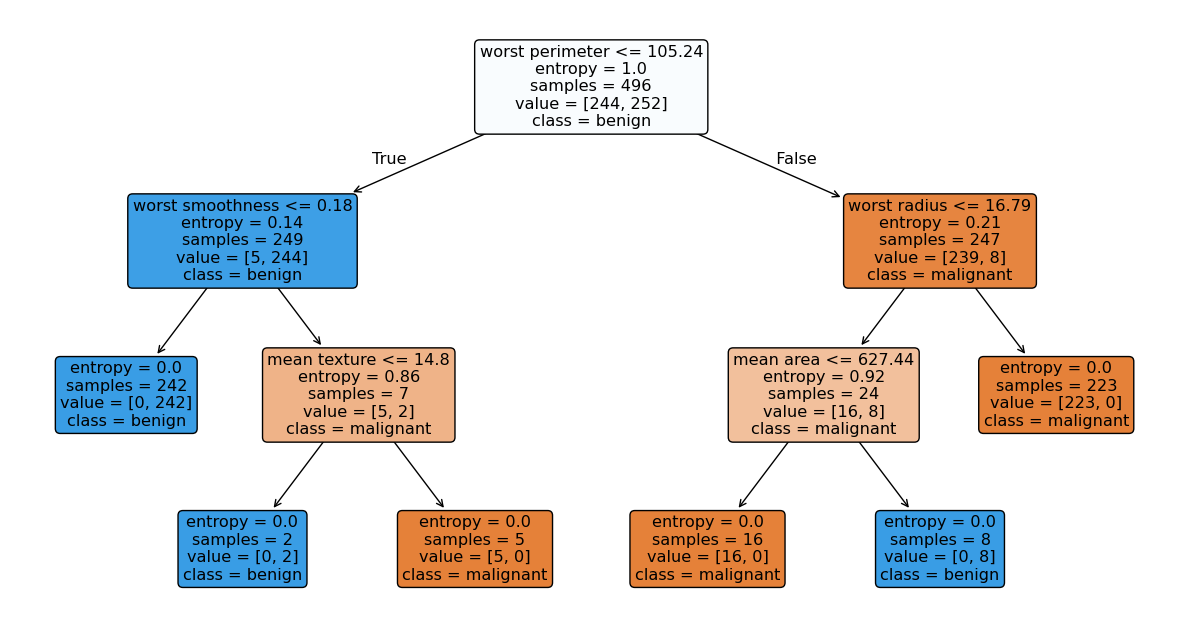

In [65]:
plt.figure(figsize=(15, 8))
plot_tree(
    tree_model,
    rounded=True,
    precision=2,
    filled=True, 
    feature_names=cancer_df.columns, 
    class_names=['malignant', 'benign']
)
plt.show()

Let's evaluate the model on the test data.

In [66]:
y_pred = tree_model.predict(X_test)
print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

Accuracy: 0.992
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        63
           1       1.00      0.98      0.99        62

    accuracy                           0.99       125
   macro avg       0.99      0.99      0.99       125
weighted avg       0.99      0.99      0.99       125



### Ensemble Methods - Random Forests

In [67]:
randomforest_model = RandomForestClassifier(random_state=42)

Define hyperparameters to be optimized.

In [68]:
param_grid = {
    'n_estimators': [51, 101, 201],
    'max_depth': [3, 5, 10, None]
}

Run Grid Search to find the best hyperparameters.

In [69]:
grid_search = GridSearchCV(estimator=randomforest_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 10, None],
                         'n_estimators': [51, 101, 201]},
             scoring='accuracy')

Let's check out the best parameters.

In [70]:
print('Best Parameters are: {}'.format(grid_search.best_params_))

Best Parameters are: {'max_depth': 5, 'n_estimators': 51}


Get the best Random Forest Model.

In [71]:
best_randomforest_model = grid_search.best_estimator_

Use the best model to make predictions on the test set.

In [72]:
randomforest_predictions = best_randomforest_model.predict(X_test)

Print the accuracy of the model.

In [73]:
print("Random Forest Accuracy is {}".format(accuracy_score(y_test, randomforest_predictions)))
print(classification_report(y_test, randomforest_predictions))

Random Forest Accuracy is 0.992
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        63
           1       1.00      0.98      0.99        62

    accuracy                           0.99       125
   macro avg       0.99      0.99      0.99       125
weighted avg       0.99      0.99      0.99       125



### Ensemble Methods - XGBoost

In [74]:
xgboost_model = XGBClassifier(eval_metric='logloss', random_state=42)

Define the parameters to optimize.

In [75]:
param_grid_xgb = {
    'n_estimators': [51, 101, 201],
    'max_depth': [3, 5, 10]
}

Run Grid Search to find the best hyperparameters.

In [76]:
grid_search_xgboost = GridSearchCV(estimator=xgboost_model, param_grid=param_grid_xgb, cv=5, scoring='accuracy')
grid_search_xgboost.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'max_depth': [3, 5, 10],
                         'n_estimators': [51, 101, 201]},
             scoring='accuracy')

Let's check out the best parameters.

In [77]:
print("Best Parameters for XGBoost are {}".format(grid_search_xgboost.best_params_))

Best Parameters for XGBoost are {'max_depth': 3, 'n_estimators': 51}


Get the best XGBoost Model.

In [78]:
best_xgboost_model = grid_search_xgboost.best_estimator_

Use the best model to make predictions on the test set.

In [79]:
xgboost_predictions = best_xgboost_model.predict(X_test)

In [80]:
print("XGBoost Accuracy is {}".format(accuracy_score(y_test, xgboost_predictions)))
print(classification_report(y_test, xgboost_predictions))

XGBoost Accuracy is 0.992
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        63
           1       1.00      0.98      0.99        62

    accuracy                           0.99       125
   macro avg       0.99      0.99      0.99       125
weighted avg       0.99      0.99      0.99       125



## Regression

In [30]:
diabetes = load_diabetes()

In [31]:
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target

In [32]:
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


**age**: Age of the individual (standardized).<br>
**sex**: Gender (standardized, where 1 usually represents male and -1 represents female).<br>
**bmi**: Body Mass Index (BMI), a measure of body fat based on height and weight (standardized).<br>
**bp**: Average blood pressure (standardized).<br>
**s1**: T-Cells (a type of white blood cell, standardized).<br>
**s2**: Low-density lipoproteins (LDL) cholesterol levels (standardized).<br>
**s3**: High-density lipoproteins (HDL) cholesterol levels (standardized).<br>
**s4**: Total cholesterol to HDL ratio (standardized).<br>
**s5**: Log of serum triglycerides level (standardized).<br>
**s6**: Blood sugar level (standardized).<br>

In [33]:
X = diabetes_df.drop(columns='target')
y = diabetes_df['target']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Decision Trees

In [35]:
decision_tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)

In [36]:
decision_tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

<Figure size 1200x800 with 0 Axes>

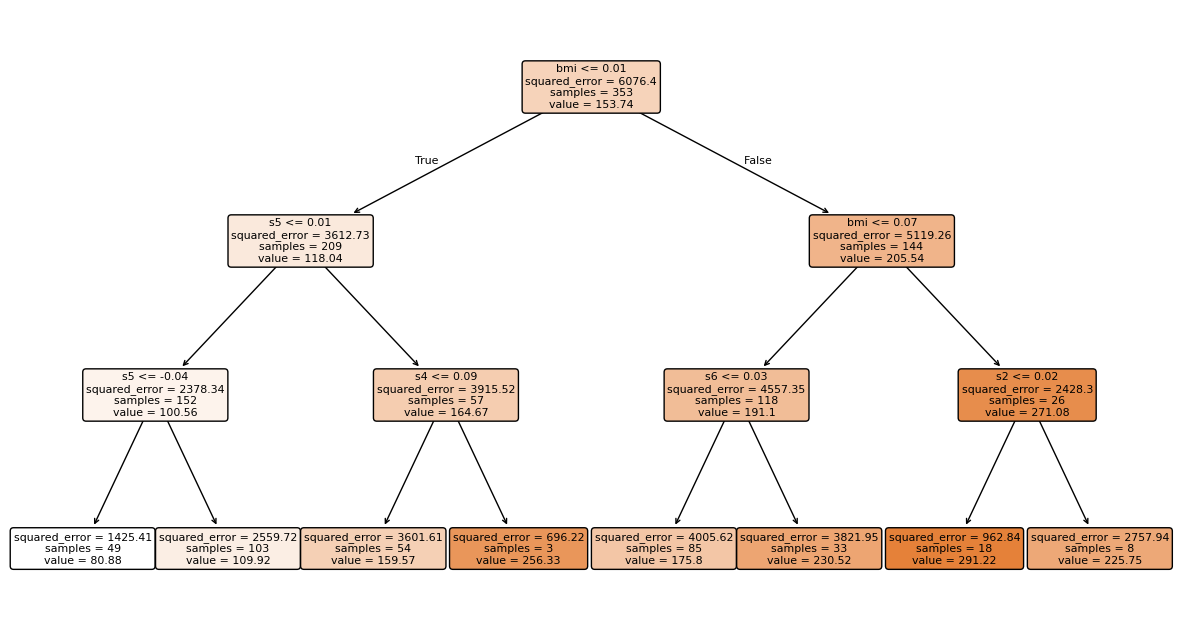

In [37]:
plt.figure(figsize=(12, 8))
plt.figure(figsize=(15, 8))
plot_tree(
    decision_tree_regressor,
    rounded=True,
    precision=2,
    filled=True, 
    feature_names=diabetes_df.columns, 
)
plt.show()

In [38]:
def evaluate_model(y_true, y_pred):
    rmse = root_mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print("The RMSE and the R2 values of the model are: {}, {}".format(rmse, r2))

In [39]:
decision_tree_predictions = decision_tree_regressor.predict(X_test)

In [40]:
evaluate_model(y_test, decision_tree_predictions)

The RMSE and the R2 values of the model are: 59.60454104616319, 0.3294451571119206


### Random Forests

In [41]:
randomforest_model = RandomForestRegressor(random_state=42)

In [42]:
param_grid = {
    'n_estimators': [51, 101, 201],
    'max_depth': [3, 5, 10, None]
}

In [43]:
grid_search = GridSearchCV(estimator=randomforest_model, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [3, 5, 10, None],
                         'n_estimators': [51, 101, 201]},
             scoring='r2')

In [44]:
print('Best Parameters are: {}'.format(grid_search.best_params_))

Best Parameters are: {'max_depth': 3, 'n_estimators': 201}


In [45]:
best_randomforest_model = grid_search.best_estimator_

In [46]:
randomforest_predictions = best_randomforest_model.predict(X_test)

In [47]:
evaluate_model(y_test, randomforest_predictions)

The RMSE and the R2 values of the model are: 52.66598846566669, 0.47647661435097044


### XGBoost

In [48]:
xgboost_model = XGBRegressor(random_state=42)

In [49]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

In [50]:
grid_search_xgboost = GridSearchCV(estimator=xgboost_model, param_grid=param_grid, cv=5, scoring='r2')
grid_search_xgboost.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [51]:
best_xgboost_model = grid_search_xgboost.best_estimator_

In [52]:
xgboost_predictions = best_xgboost_model.predict(X_test)

In [53]:
evaluate_model(y_test, xgboost_predictions)

The RMSE and the R2 values of the model are: 53.293562807707026, 0.4639255401595046
